## Using cattle breed dataset from kaggle

This Cattle Breeds Dataset consists of 5 different breeds [Ayrshire, Brown Swiss, Holstein Friesian, Jersey, Red Dane].

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import zipfile
from pathlib import Path

import os
import random
from PIL import Image

In [36]:
image_data_path = Path("./data/archive/Cattle Breeds")

def walk_through(image_data_path):
    image_dirs = []
    for dirpath, dirnames, filenames in os.walk(image_data_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
        temp = Path(dirpath)
        image_dirs.append(temp)
    return image_dirs
    
image_dirs = walk_through(image_data_path)
image_dirs.pop(0)

There are 5 directories and 0 images in 'data/archive/Cattle Breeds'.
There are 0 directories and 260 images in 'data/archive/Cattle Breeds/Ayrshire cattle'.
There are 0 directories and 238 images in 'data/archive/Cattle Breeds/Brown Swiss cattle'.
There are 0 directories and 254 images in 'data/archive/Cattle Breeds/Holstein Friesian cattle'.
There are 0 directories and 252 images in 'data/archive/Cattle Breeds/Jersey cattle'.
There are 0 directories and 204 images in 'data/archive/Cattle Breeds/Red Dane cattle'.


PosixPath('data/archive/Cattle Breeds')

In [37]:
image_dirs

[PosixPath('data/archive/Cattle Breeds/Ayrshire cattle'),
 PosixPath('data/archive/Cattle Breeds/Brown Swiss cattle'),
 PosixPath('data/archive/Cattle Breeds/Holstein Friesian cattle'),
 PosixPath('data/archive/Cattle Breeds/Jersey cattle'),
 PosixPath('data/archive/Cattle Breeds/Red Dane cattle')]

In [38]:
image_dirs[0].name
list(image_dirs[0].glob("*.jpg"))

[PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle0.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle0_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle1.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle10.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle100.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle100_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle101.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle101_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle102.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle102_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle103.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle103_c.jpg'),
 PosixPath('data/archive/Cattle Breed

In [39]:
# len(image_dirs)

In [40]:
images , label = [] , []

for path in image_dirs:
    image_paths = list(path.glob("*.jpg"))
    for image_path in image_paths:
        images.append(Image.open(image_path))
        label.append(path.name)

In [41]:
len(images)

1208

In [42]:
random.randint(1,255)

150

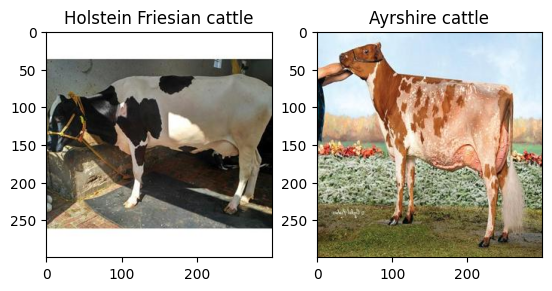

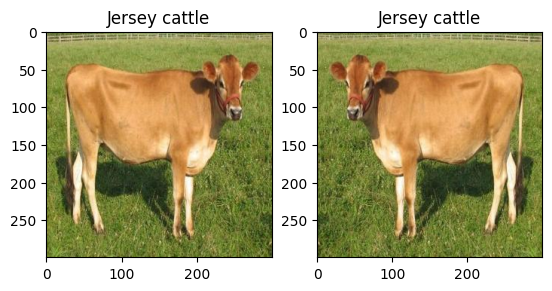

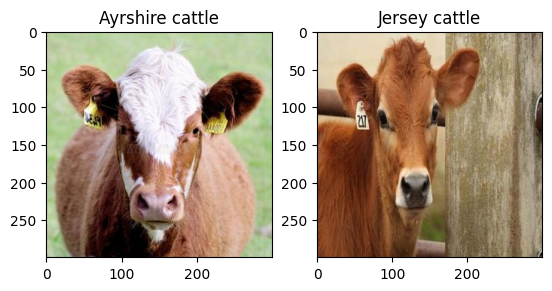

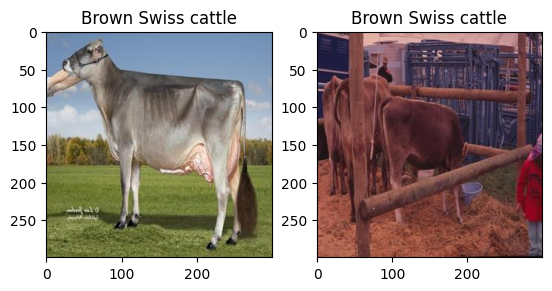

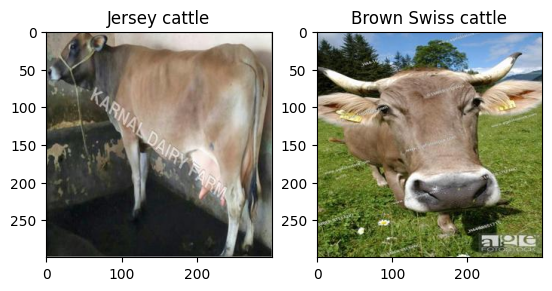

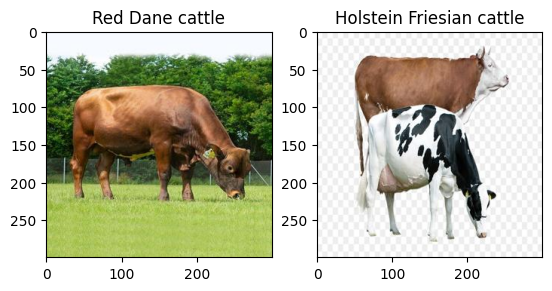

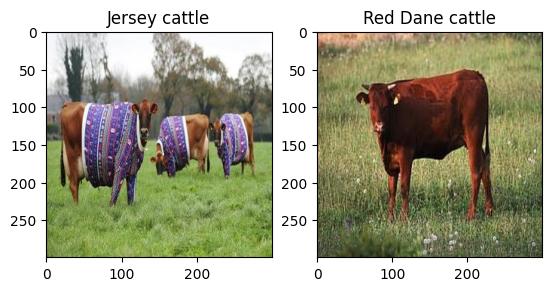

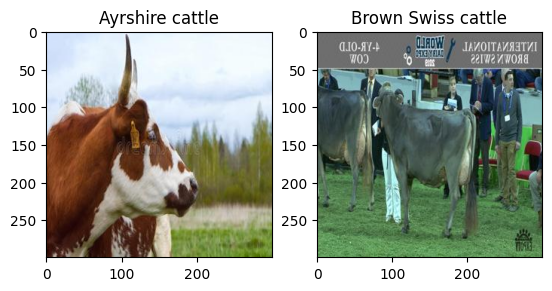

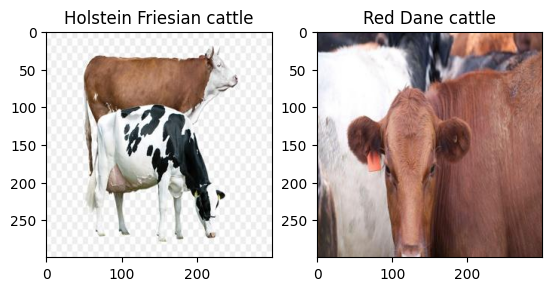

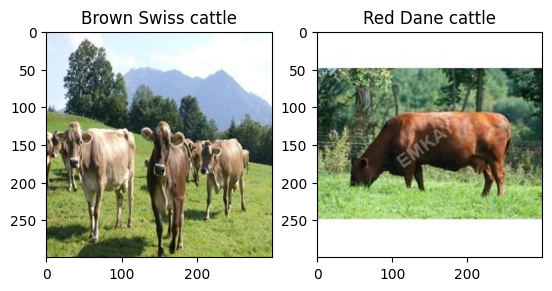

In [43]:
rows, cols = 1,2
for i in range(10):
    fig, axes = plt.subplots(rows,cols)
    a1 = int(random.randint(1,len(images)))
    a2 = int(random.randint(1,len(images)))
    axes[0].imshow(images[a1])
    axes[0].set_title(label[a1])
    axes[1].imshow(images[a2])
    axes[1].set_title(label[a2])
# plt.title(label[0])
# plt.show()

In [44]:
import torch
import torch.nn as nn
from torchvision.transforms import v2
from torch.utils.data import DataLoader
from typing import Tuple, Dict, List 
from torch.utils.data import Dataset
# from torchinfo import summary
# from torch.utils.tensorboard import SummaryWriter
from collections import OrderedDict


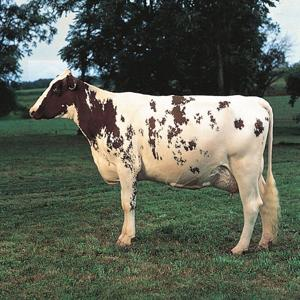

In [45]:
images[0]

In [46]:

H, W = 32, 32
# img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)
img = images[0]

transforms = v2.Compose([
    v2.Resize(size=(64,64)),
    v2.PILToTensor(),
])
img = transforms(img)
# plt.imshow(img[0]+img[1]+img[2])
img.shape

torch.Size([3, 64, 64])

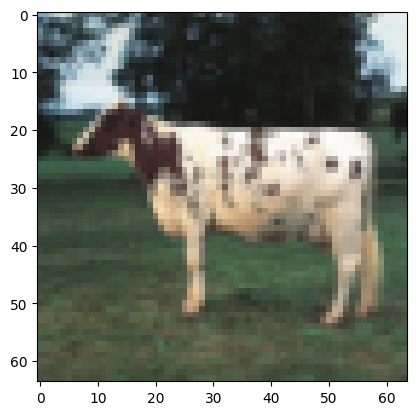

In [47]:
plt.imshow(img.permute((1,2,0)))

In [48]:

train_dataloader = DataLoader(dataset=images,
                             batch_size=1,
                             num_workers=1,
                             shuffle=True)
train_dataloader

# test_dataloader = DataLoader(dataset=test_data,
#                              batch_size=1,
#                              num_workers=1,
#                              shuffle=True)

In [49]:
def find_classes(dir: str) -> Tuple[List[str], Dict[str,int]] :
    classes = sorted([entry.name for entry in list(os.scandir(dir)) if entry.is_dir()])

    if not classes:
        print("Couldn't find any classes in target directory")
        return None
    class_idx = {class_name: i for i,class_name in enumerate(classes)}
    return classes, class_idx

In [50]:
find_classes(image_data_path)

(['Ayrshire cattle',
  'Brown Swiss cattle',
  'Holstein Friesian cattle',
  'Jersey cattle',
  'Red Dane cattle'],
 {'Ayrshire cattle': 0,
  'Brown Swiss cattle': 1,
  'Holstein Friesian cattle': 2,
  'Jersey cattle': 3,
  'Red Dane cattle': 4})

In [51]:
(image_data_path / list(os.scandir(image_data_path))[0]).glob("*.jpg")

<generator object Path.glob at 0x7ff0e7ec1140>

In [52]:
class ImageFolderCustom(Dataset):
    def __init__(self, target_dir: str, transform: None):
        self.classes = []
        self.class_idx = {}
        self.paths = []
        self.p,self.q = find_classes(target_dir)
        for path in image_dirs:
            image_paths = list(path.glob("*.jpg"))
            for image_path in image_paths:
                self.paths.append(image_path)
                self.classes.append(image_path.name)
                self.class_idx[image_path.name] = self.q[path.name]
        # self.classes, self.class_idx = find_classes(target_dir)
        self.transform = transform

    def loadImage(self, index):
        img = self.paths[index]
        return Image.open(img)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img = self.loadImage(index)
        class_name = self.paths[index].name
        class_idx = self.class_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [53]:
data_transform = v2.Compose([
    v2.Resize(size=(128,128)),
    v2.ToTensor()
])

/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [54]:

img_custom = ImageFolderCustom(image_data_path, transform= data_transform)
# test_img_custom = ImageFolderCustom("./temp/data/pizza_steak_sushi/test", transform= data_transform)
len(img_custom.paths)

1208

In [55]:
img_custom_dataloader = DataLoader(img_custom, batch_size=64)
img_custom_dataloader

Feature batch shape: torch.Size([64, 3, 128, 128])
Labels batch shape: torch.Size([64])


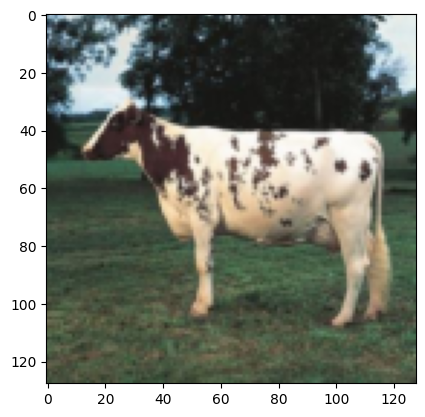

Label: 0


In [56]:
train_features, train_labels = next(iter(img_custom_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")

In [57]:
train_size = int(0.8 * len(img_custom))
test_size = len(img_custom) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(img_custom, [train_size, test_size])

In [58]:
train_size, test_size

(966, 242)

In [59]:
train_dataloader = DataLoader(train_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

Feature batch shape: torch.Size([64, 3, 128, 128])
Labels batch shape: torch.Size([64])


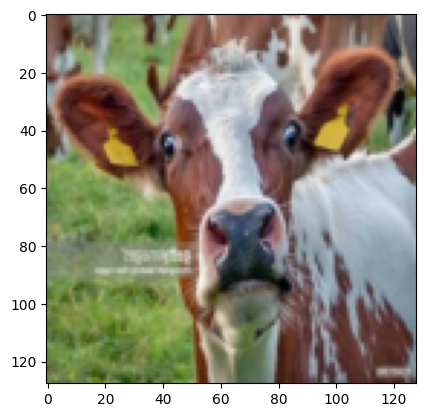

Label: 0


In [60]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")

In [61]:
img_custom.classes

['Ayrshirecattle0.jpg',
 'Ayrshirecattle0_c.jpg',
 'Ayrshirecattle1.jpg',
 'Ayrshirecattle10.jpg',
 'Ayrshirecattle100.jpg',
 'Ayrshirecattle100_c.jpg',
 'Ayrshirecattle101.jpg',
 'Ayrshirecattle101_c.jpg',
 'Ayrshirecattle102.jpg',
 'Ayrshirecattle102_c.jpg',
 'Ayrshirecattle103.jpg',
 'Ayrshirecattle103_c.jpg',
 'Ayrshirecattle104.jpg',
 'Ayrshirecattle104_c.jpg',
 'Ayrshirecattle105.jpg',
 'Ayrshirecattle105_c.jpg',
 'Ayrshirecattle106.jpg',
 'Ayrshirecattle106_c.jpg',
 'Ayrshirecattle107.jpg',
 'Ayrshirecattle107_c.jpg',
 'Ayrshirecattle109.jpg',
 'Ayrshirecattle109_c.jpg',
 'Ayrshirecattle10_c.jpg',
 'Ayrshirecattle11.jpg',
 'Ayrshirecattle111.jpg',
 'Ayrshirecattle111_c.jpg',
 'Ayrshirecattle113.jpg',
 'Ayrshirecattle113_c.jpg',
 'Ayrshirecattle116.jpg',
 'Ayrshirecattle116_c.jpg',
 'Ayrshirecattle117.jpg',
 'Ayrshirecattle117_c.jpg',
 'Ayrshirecattle118.jpg',
 'Ayrshirecattle118_c.jpg',
 'Ayrshirecattle119.jpg',
 'Ayrshirecattle119_c.jpg',
 'Ayrshirecattle11_c.jpg',
 'Ayrshireca

In [62]:
class MyModel(nn.Module):
    def __init__(self,num_classes):
        super(MyModel,self).__init__()

        self.conv1 = nn.Sequential( # 64*3*128*128 => 64*10*128*128
            nn.Conv2d(in_channels=3, out_channels=10,kernel_size=3, stride=1,padding=1),
            nn.BatchNorm2d(10),
            nn.ReLU()
        )
        
        self.conv2 = nn.Sequential( # 64*3*128*128 => 64*10*128*128
            nn.Conv2d(in_channels=10, out_channels=10,kernel_size=3, stride=1,padding=1),
            nn.BatchNorm2d(10),
            nn.ReLU()
        )

        self.flatten = nn.Linear(10*128*128,num_classes)

    def forward(self, x):
        N = x.shape[0]
        
        # print("MyModel: ")
        # print("Shape of x: ", x.shape)
        x = self.conv1(x)
        # print("Shape of x after conv1: ", x.shape)
        x = self.conv2(x)
        # print("Shape of x after conv2: ", x.shape)
        x = x.reshape(N,-1)
        x = self.flatten(x)
        return x
        
    

In [63]:
10*128*128

163840

In [64]:
num_classes = len(img_custom.p)
num_epochs = 1
batch_size = 16
learning_rate = 0.005

model = MyModel(num_classes=num_classes)


# Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(train_dataloader)

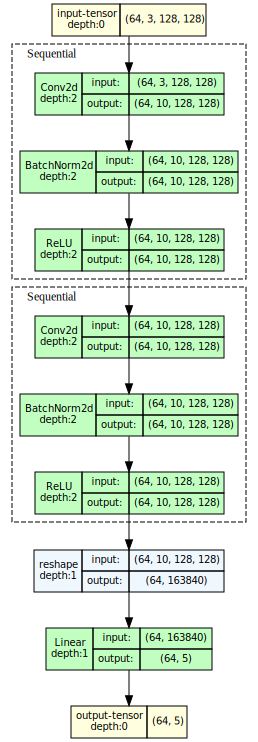

In [65]:
from torchview import draw_graph

# model = testInceptionBlock()

architecture = 'MyModel'
model_graph = draw_graph(model, input_size=(64,3,128,128), graph_dir ='TB' , roll=True, expand_nested=True, graph_name=f'self_{architecture}',save_graph=False,filename=f'self_{architecture}')
model_graph.visual_graph

In [67]:
total_step

16

In [68]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
from helper_functions import accuracy_fn

In [69]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model.parameters(),
    lr = 0.1
)

In [70]:
torch.manual_seed(42)
train_start_time = timer()

epochs = 2

test_loss_ = []
test_acc_ = []

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_loss = 0
    
    for batch, (X,y) in enumerate(train_dataloader):
        print(batch,X.shape,y.shape)
        model.train()

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        del X,y
        
#         if batch == 15:
#             break

#         if batch % 10 == 0:
#             print(f"Batches {batch*len(X)}/{len(train_dataloader.dataset)} samples finished.")

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0,0

    model.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

        test_loss_.append(test_loss)
        test_acc_.append(test_acc)

    print(f"\nTrain Loss: {train_loss:.4f} Test loss: {test_loss:.4f}")


train_end_time = timer()

print(f"Total time = {train_end_time - train_start_time}")

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 0

0 torch.Size([64, 3, 128, 128]) torch.Size([64])
1 torch.Size([64, 3, 128, 128]) torch.Size([64])
2 torch.Size([64, 3, 128, 128]) torch.Size([64])
3 torch.Size([64, 3, 128, 128]) torch.Size([64])
4 torch.Size([64, 3, 128, 128]) torch.Size([64])
5 torch.Size([64, 3, 128, 128]) torch.Size([64])
6 torch.Size([64, 3, 128, 128]) torch.Size([64])
7 torch.Size([64, 3, 128, 128]) torch.Size([64])
8 torch.Size([64, 3, 128, 128]) torch.Size([64])
9 torch.Size([64, 3, 128, 128]) torch.Size([64])
10 torch.Size([64, 3, 128, 128]) torch.Size([64])
11 torch.Size([64, 3, 128, 128]) torch.Size([64])
12 torch.Size([64, 3, 128, 128]) torch.Size([64])
13 torch.Size([64, 3, 128, 128]) torch.Size([64])
14 torch.Size([64, 3, 128, 128]) torch.Size([64])
15 torch.Size([6, 3, 128, 128]) torch.Size([6])

Train Loss: 34.6065 Test loss: 38.0635
Epoch: 1

0 torch.Size([64, 3, 128, 128]) torch.Size([64])
1 torch.Size([64, 3, 128, 128]) torch.Size([64])
2 torch.Size([64, 3, 128, 128]) torch.Size([64])
3 tor

In [71]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader:
#         images = images.to(device)
#         labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs
        print(correct,total)

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))   

14 64
28 128
40 192
53 242
Accuracy of the network on the 10000 test images: 21.90082644628099 %


In [ ]:
train_features[0].shape

Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


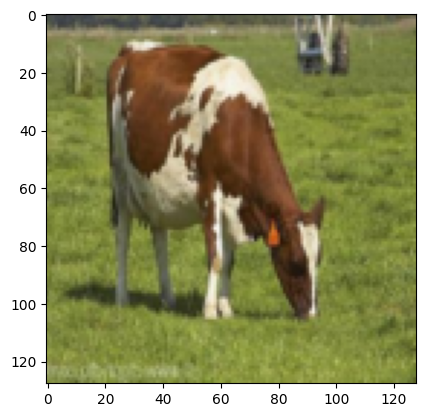

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


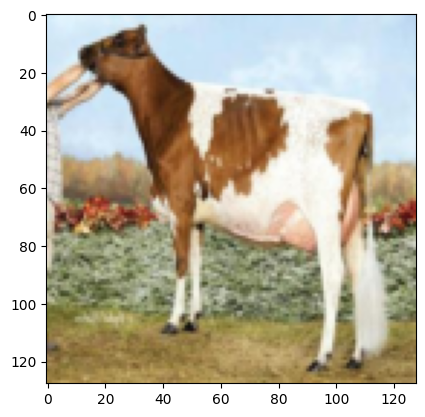

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


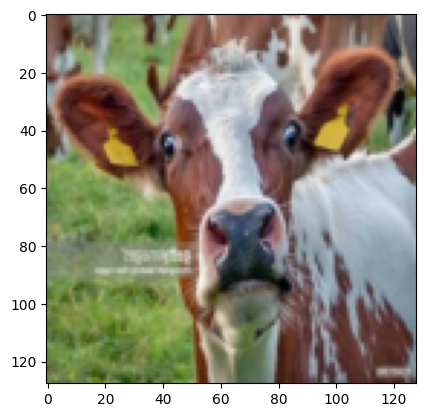

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


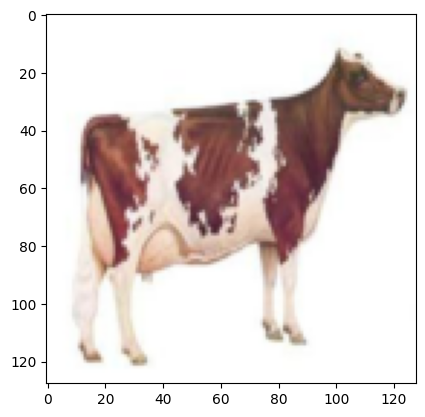

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


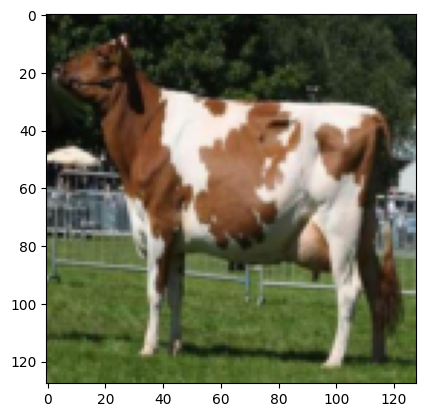

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


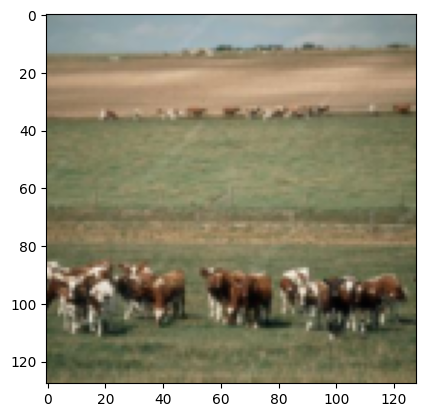

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


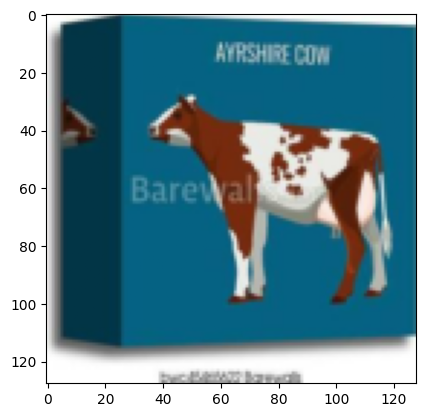

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


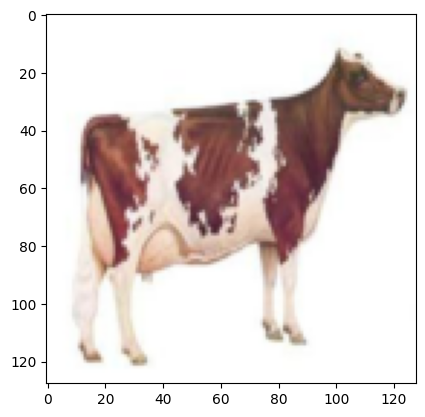

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


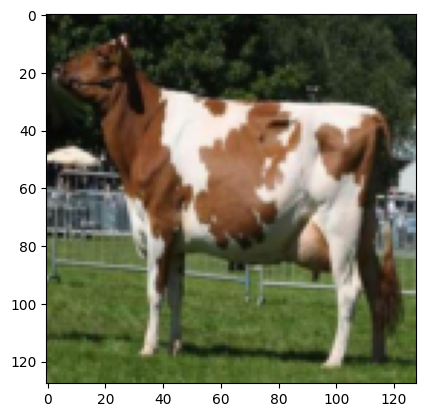

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


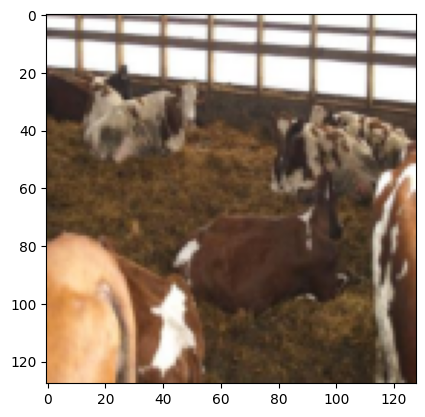

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


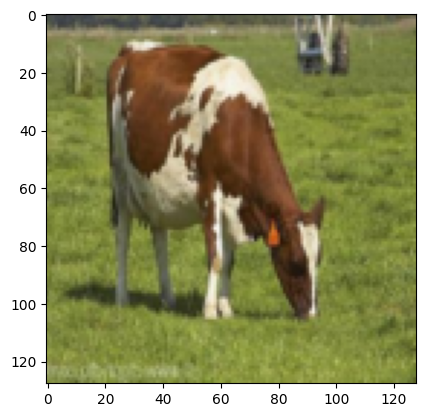

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


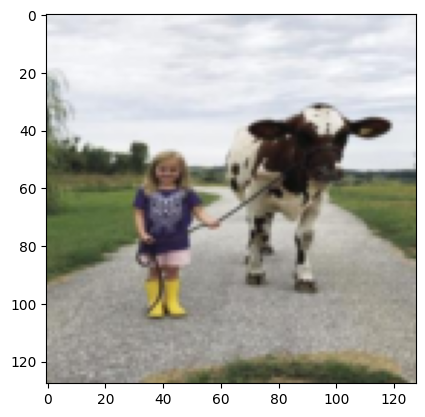

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


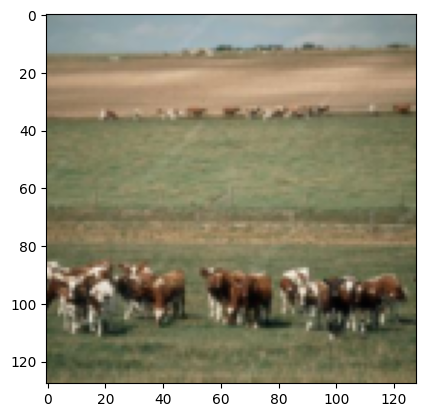

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


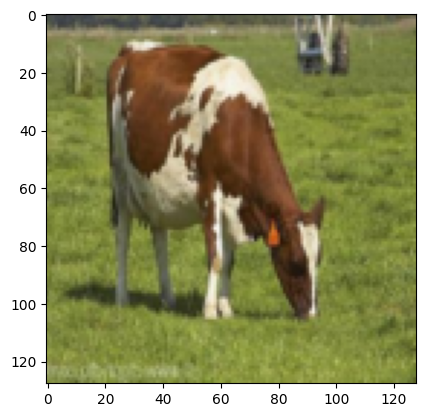

Label: 0
Predicted:  Ayrshire cattle 
Actual:  Ayrshire cattle


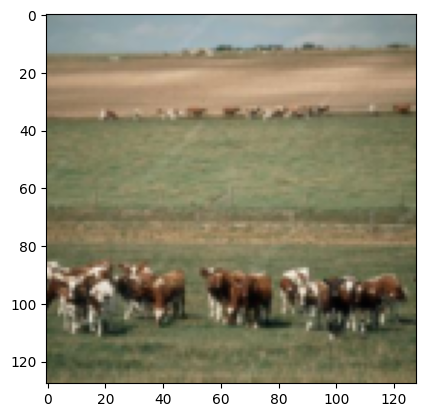

Label: 0


In [72]:
random.seed(42)

train_features, train_labels = next(iter(train_dataloader))

for i in range(100):
    temp = random.randint(0,63)
    img = train_features[temp].squeeze()
    label = train_labels[temp]
    _,label_pred = torch.max(model(train_features[0].unsqueeze(dim=0)),1)
    if(label == label_pred):
        print("Predicted: ",img_custom.p[label_pred],"\nActual: ",img_custom.p[label])
        plt.imshow(img.permute(1,2,0), cmap="gray")
        plt.show()
        print(f"Label: {label}")

In [73]:
from torchsummary import summary

summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 10, 128, 128]             280
       BatchNorm2d-2         [-1, 10, 128, 128]              20
              ReLU-3         [-1, 10, 128, 128]               0
            Conv2d-4         [-1, 10, 128, 128]             910
       BatchNorm2d-5         [-1, 10, 128, 128]              20
              ReLU-6         [-1, 10, 128, 128]               0
            Linear-7                    [-1, 5]         819,205
Total params: 820,435
Trainable params: 820,435
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 7.50
Params size (MB): 3.13
Estimated Total Size (MB): 10.82
----------------------------------------------------------------


In [74]:
test_features, test_labels = next(iter(test_dataloader))
train_features.shape, test_labels.shape

(torch.Size([64, 3, 128, 128]), torch.Size([64]))

In [ ]:
torch.argmax(torch.sigmoid(y_predicted),dim=1), y_test, test_labels.shape[0]

In [ ]:
torch.zeros(y_predicted.shape), temp

In [77]:
from sklearn.metrics import confusion_matrix
with torch.no_grad():
    model.eval()
    y_test = test_labels.reshape((test_labels.shape[0],1))
    y_predicted = model(test_features)
    temp = torch.argmax(torch.sigmoid(y_predicted),dim=1).unsqueeze(dim=0).reshape((test_labels.shape[0],1))
    # temp1 = torch.zeros(y_predicted.shape)
    # temp1[temp] = 1
    cm = confusion_matrix(y_test, temp.numpy())
cm

array([[14,  0,  0,  0,  0],
       [14,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  0],
       [21,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0]])

<Axes: >

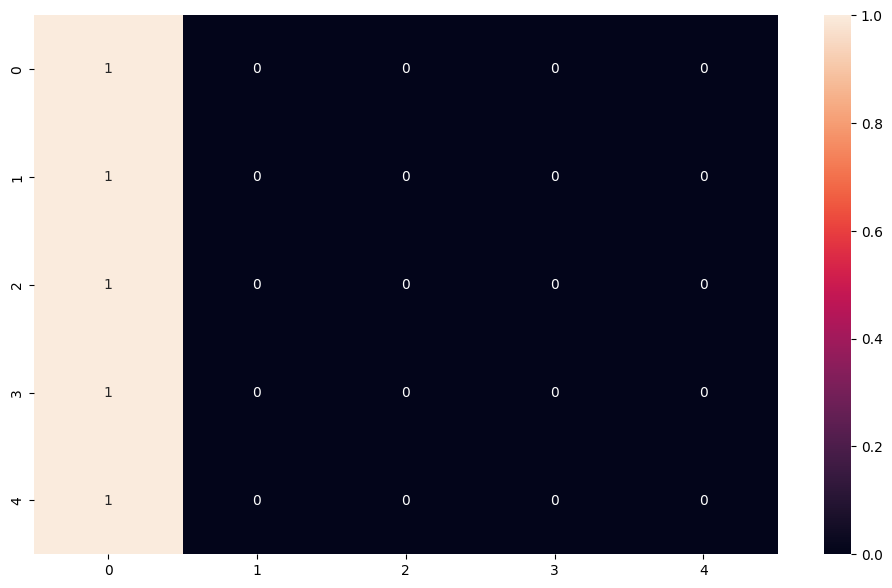

In [78]:
import seaborn as sn

df_cm = pd.DataFrame(cm / np.sum(cm, axis=1)[:, None], index = [i for i in range(num_classes)],
                     columns = [i for i in range(num_classes)])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
# plt.savefig('output.png')

In [97]:
y_test.reshape(-1), y_predicted.shape, temp.reshape(-1)

(tensor([1, 1, 0, 2, 0, 0, 3, 1, 3, 0, 1, 4, 1, 0, 3, 4, 2, 0, 0, 3, 2, 1, 3, 2,
         3, 3, 1, 3, 3, 2, 1, 3, 1, 3, 3, 1, 3, 1, 3, 2, 4, 4, 1, 3, 4, 1, 0, 2,
         3, 4, 0, 0, 3, 3, 3, 0, 2, 4, 1, 0, 3, 0, 0, 3]),
 torch.Size([64, 5]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

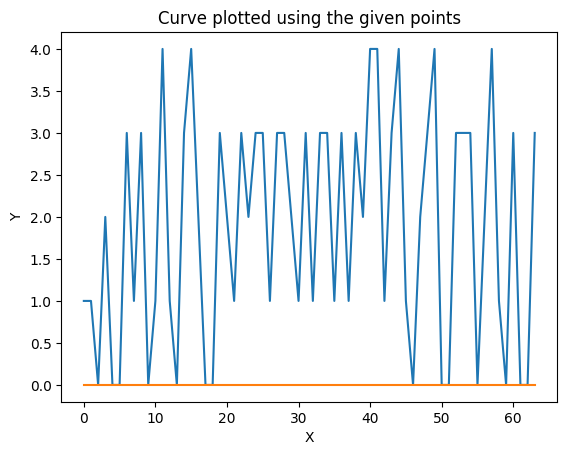

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [98]:
t = np.array([i for i in range(y_test.shape[0])])
plt.plot(t, y_test.reshape(-1).numpy())
plt.plot(t, temp.reshape(-1).numpy())
plt.title("Curve plotted using the given points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
t

In [87]:
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])